In [38]:
import vedo
from Pipeline import *
from MeshObject import *
from mesh_properties import *

p = Pipeline()
# mesh.show()

In [2]:
# def _eigen_vectors(mesh: MeshObject) -> np.ndarray:
#         coordinates = mesh.vertices
#         cov_matrix = np.cov(coordinates.T)
#         e_vals, e_vectors = np.linalg.eig(cov_matrix) # eigen vectors are normalized!!
#         print(e_vectors)
#         print(e_vectors.T)

#         e_vectors = e_vectors.T
#         e_vals = np.sort(e_vals)[::-1] # sort e_vals from high to low then select their corresponding e val
#         e_vectors = e_vectors[np.argsort(e_vals)[::-1]] 
#         e_vectors[2] = np.cross(e_vectors[0], e_vectors[1])

#         return e_vals, e_vectors.T

# def _align_to_principal_axes(mesh: MeshObject) -> None:
#     _, eigen_vectors = _eigen_vectors(mesh)
#     mesh.coordinates = np.dot(mesh.coordinates, eigen_vectors)

#     return mesh

# evals, evectors = _eigen_vectors(mesh)
# _align_to_principal_axes(mesh)
# plt = Plotter(axes=1)

# eigen_major = Line([0,0,0], evectors[0], c="red", lw=2)
# eigen_medium = Line([0,0,0], evectors[1], c="blue", lw=2)
# eigen_minor = Line([0,0,0], evectors[2], c="green", lw=2)

# plt.show(mesh, eigen_major, eigen_medium, eigen_minor)

[[ 0.99558751  0.05642147  0.07498085]
 [ 0.07730096 -0.04012556 -0.99620003]
 [ 0.05319842 -0.9976004   0.04430994]]
[[ 0.99558751  0.07730096  0.05319842]
 [ 0.05642147 -0.04012556 -0.9976004 ]
 [ 0.07498085 -0.99620003  0.04430994]]
[[ 0.99558751  0.05642147  0.07498085]
 [ 0.07730096 -0.04012556 -0.99620003]
 [ 0.05319842 -0.9976004   0.04430994]]
[[ 0.99558751  0.07730096  0.05319842]
 [ 0.05642147 -0.04012556 -0.9976004 ]
 [ 0.07498085 -0.99620003  0.04430994]]


In [6]:
# # np.random.seed(12)
# plt.clear()
# random_points = np.random.choice(range(len(mesh.vertices)), size=3)
# p1, p2, p3 = mesh.vertices[random_points]

# angle = a3(p1, p2, p3)

# l1 = Line([p1]).c("red").ps(25)
# l2 = Line([p2]).c("red").ps(25)
# l3 = Line([p3]).c("red").ps(25)

# line12 = Line(p1, p2).c("red")
# line13 = Line(p1, p3).c("red")

# plt.show(mesh, l1, l2, l3, line12, line13)

# # plt.show(mesh, l1, l2, l3)

In [42]:
def _subdivide_shape(vedo_mesh: MeshObject, subdivision_type: str="linear", threshold: int=5000):
        if not vedo_mesh.is_manifold():
            return vedo_mesh
        
        match subdivision_type:
            case "loop":
                subdivision_type = 0
            case "linear":
                subdivision_type = 1
            case "adaptive":
                subdivision_type = 2
            case "butterfly":
                subdivision_type = 3
            case "centroid":
                subdivision_type = 4
        last_vertex_count = -1
        while vedo_mesh.n_vertices < threshold:
            vedo_mesh = vedo_mesh.subdivide(1, method=subdivision_type)
            if last_vertex_count == vedo_mesh.n_vertices:
                break
            last_vertex_count = vedo_mesh.n_vertices
        vedo_mesh.decimate(0.5, threshold)

        return vedo_mesh

mesh: MeshObject = MeshObject("../ShapeDatabase_INFOMR_orig/Door/D01121.obj", visualize=True)
print(mesh)
_subdivide_shape(mesh, subdivision_type="centroid").show()

MeshObject.MeshObject at (0x50de630)                                       
file name     : ../ShapeDatabase_INFOMR_orig/Door/D01121.obj
color         : gray, rgb=(0.502, 0.502, 0.502), alpha=1.0
elements      : vertices=16 polygons=16 lines=0
position      : (0, 0, 0)
scaling       : (1.00000, 1.00000, 1.00000)
size          : average=0.547230, diagonal=1.09450
center of mass: (0.296429, 0.500000, 0.0384018)
bounds        : x=(0.0250, 0.568), y=(0.0250, 0.975), z=(0.0250, 0.0521)
celldata      : "GroupIds" (float32), dim=1, range=(0, 0)


In [7]:
# plt1 = Plotter()

# p1 = np.asarray([1,0,0])
# p2 = np.asarray([0,1,0])
# p3 = np.asarray([0,0,1])

# l1 = Line([p1]).c("red").ps(25)
# l2 = Line([p2]).c("red").ps(25)
# l3 = Line([p3]).c("red").ps(25)
# line12 = Line(p1, p2).c("red")
# line13 = Line(p1, p3).c("red")
# line23 = Line(p2, p3).c("red")
# spline_angle = Spline([p3,p1/2,p2/2])

# angle = a3(p1,p2,p3) * (180/np.pi)
# print(angle)
# plt1.show(l1, l2, l3, line12, line13, line23,spline_angle)

In [8]:
path = "../ShapeDatabase_INFOMR_orig/Ship/"
props_bed = []
for shape in os.listdir(path):
    mesh = MeshObject(path + shape)
    props_bed += [shape_property_computation(mesh, num_samples=10000)]

import seaborn as sns

for item in props_bed:
    d1 = item["a3"]
    sns.kdeplot(d1)

/home/keddie/Desktop/2024-2025/MR/MR_Project/mesh_properties.py:70: SyntaxWarning: invalid escape sequence '\ '
  """


KeyboardInterrupt: 

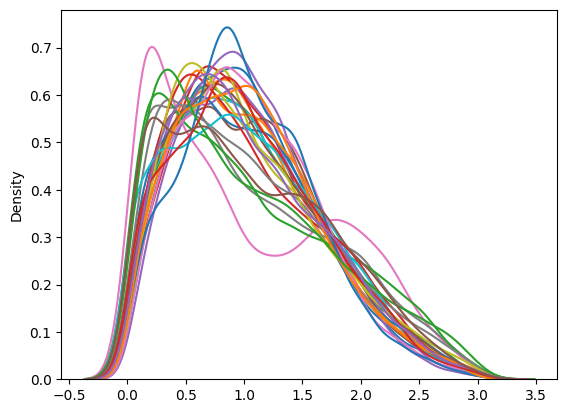

In [ ]:
path = "../ShapeDatabase_INFOMR_orig/Mug/"
props_bed = []
for shape in os.listdir(path):
    mesh = MeshObject(path + shape)
    props_bed += [shape_property_computation(mesh, num_samples=10000)]

import seaborn as sns

for item in props_bed:
    d1 = item["a3"]
    sns.kdeplot(d1)

In [ ]:
evals, evectors = _eigen_vectors(mesh)
evectors

[[ 0.8152953   0.57891218  0.01242028]
 [ 0.5788946  -0.81440592 -0.0402994 ]
 [ 0.01321466 -0.04004595  0.99911045]]
[[ 0.8152953   0.5788946   0.01321466]
 [ 0.57891218 -0.81440592 -0.04004595]
 [ 0.01242028 -0.0402994   0.99911045]]


array([[ 0.8152953 ,  0.57891218, -0.01242028],
       [ 0.5788946 , -0.81440592,  0.0402994 ],
       [ 0.01321466, -0.04004595, -0.99911045]])

In [ ]:
np.dot(evectors[2],
    [1,0,0])

np.float64(0.013214660588973543)